# 1D boundary value problem

You may recall from CME 102 that in addition to initial value problems where a particular value is fixed at $t = 0$, a different class of differential equation problems is **boundary value problems** (BVPs), where the values are fixed at points in the position domain (usually endpoints).
In this last section, we will solve a few example BVPs using direct and iterative discretization methods.

## Summary of commands

In this exercise, we will demonstrate the following:
- [`arr.argsort()`](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.argsort.html) - Return the indices that would sort array `arr`.
- [`np.linalg.eig(A)`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html) - Returns eigenvalues and eigenvectors of matrix `A`.
    - We saw this back in [Example 4](4_eigen_demo)!
- [`np.diag(M, k)`](https://numpy.org/doc/stable/reference/generated/numpy.diag.html) - Returns a diagonal matrix with `M` on the `k`th diagonal; or extracts the `k`th diagonal of array `M`.
    - We saw this back in [Example 5](5_matrix_power_demo)!
    - We'll also write a custom helper function make it easier to construct tridiagonal matrices.

## Demo

A string of length $L = 1$ m is fixed at both ends, such that $y(0,t) = y(L,t) = 0$.
The motion of the string is governed by the wave equation $c^2 \dfrac{\partial^2 y}{\partial x^2} = \dfrac{\partial^2 y}{\partial t^2}$, with $c=1$.
Assume a solution of the form $y(x,t) = F(x) G(t)$.
Substituting this solution into the wave equation and dividing by $F(x) G(t)$, we obtain:

$$ \dfrac{F''(x)}{F(x)} = \dfrac{1}{c^2} \dfrac{G''(t)}{G(t)} = -k^2 \quad k\ \text{is a constant} $$

### Part (a) 

Using a central difference scheme, discretize the differential equation for $F$.
Set up a matrix equation for $F$ of the form $AF=\lambda F$.

The differential equation for $x$ is $F''(x) = -k^2 F(x)$.
It can be discretized using central difference:

$$ \dfrac{F_{i+1} - 2F_i + F_{i-1}}{\Delta x^2} = -k^2 F_i $$

In matrix notation, using the fact that both boundary conditions are $0$:

$$ \dfrac{1}{\Delta x^2} \begin{bmatrix}
-2 & 1 & 0 & \cdots & 0 \\
1 & -2 & 1 & \ddots & \vdots \\
0 & \ddots & \ddots & \ddots & 0 \\
\vdots & \ddots & 1 & -2 & 1 \\
0 & \cdots & 0 & 1 & -2 \end{bmatrix}
\begin{bmatrix} F_1 \\ F_2 \\ \vdots \\ F_{N-3} \\ F_{N-2} \end{bmatrix} = -k^2
\begin{bmatrix} F_1 \\ F_2 \\ \vdots \\ F_{N-3} \\ F_{N-2} \end{bmatrix} $$

which corresponds to an eigenvalue problem.

### Part (b)

Determine and plot the first three mode shapes of the string first using $10$ nodes, then using $100$ nodes.
What's the value of $k$ for each mode?
What does it correspond to?

First 3 k values are: [9.         6.15636258 3.1256672 ]
First 3 k values are: [9.42121933 6.28213083 3.14146084]


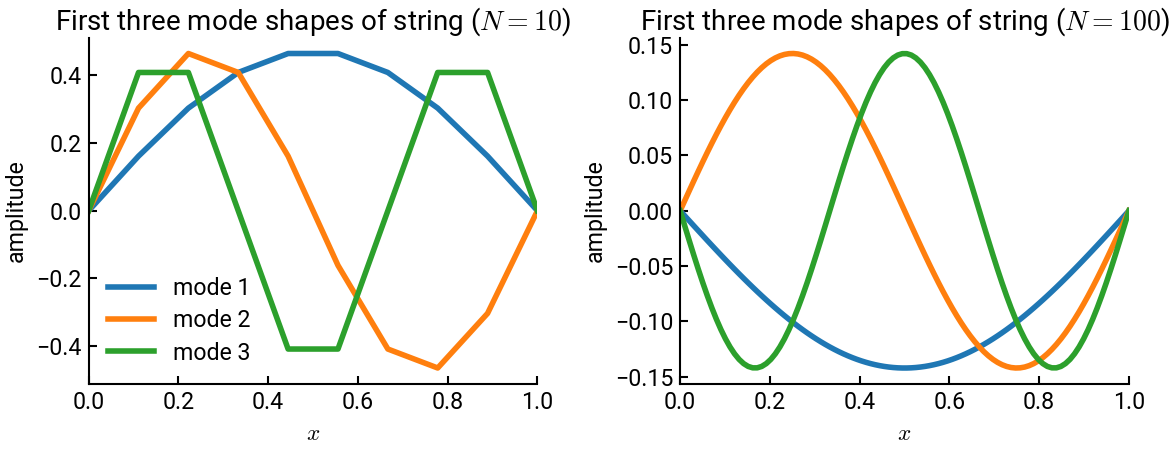

In [9]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt

# helper function to make tridiagonal matrices
def make_tridiag(a, b, c):
    """ For convenience, a, b, c should all be the same length.
        The function will automatically subset and place on the 
        corresponding diagonal. """
    return np.diag(a[1:], -1) + np.diag(b, 0) + np.diag(c[:-1], 1)

Ns = [10, 100]
fig, ax = plt.subplots(ncols=2, figsize=(12,5))
for i,N in enumerate(Ns):
    x = np.linspace(0, 1, N)
    h = x[1] - x[0]

    # construct coefficient matrix
    A = 1/h**2 * make_tridiag(np.ones(N-2), -2 * np.ones(N-2), np.ones(N-2))
    D, V = np.linalg.eig(A)
    idx = D.argsort()    # sort and store indices
    V = V[:, idx]
    D = D[idx]
    k = np.sqrt(-D)
    print(f"First 3 k values are: {k[-3:]}")

    ax[i].plot(x, np.concatenate([[0], V[:,-1], [0]]), label='mode 1')
    ax[i].plot(x, np.concatenate([[0], V[:,-2], [0]]), label='mode 2')
    ax[i].plot(x, np.concatenate([[0], V[:,-3], [0]]), label='mode 3')
    ax[i].set(xlabel='$x$', ylabel='amplitude', xlim=[0,1],
              title=f"First three mode shapes of string ($N = {N}$)")
ax[0].legend()
plt.tight_layout()
plt.show()

NumPy returns the eigenvalues in the array `D`, and in this case, they are all negative.
What we call the first modes corresponds to the smallest eigenvalues in magnitude.
They correspond to the last columns of the matrix giving the eigenvectors.

The eigenvalues are $\lambda = -k^2$.
For the first three modes, we have:
- $N = 10$: $k_1 = 3.126$, $k_2 = 6.156$, $k_3 = 9$
- $N = 100$: $k_1 = 3.141$, $k_2 = 6.282$, $k_3 = 9.421$

The theoretical values should be:
- $k_1 = \dfrac{\pi}{L} \approx 3.141 $
- $k_2 = \dfrac{2\pi}{L} \approx 6.283 $
- $k_3 = \dfrac{3\pi}{L} \approx 9.425 $

$k$ represents the **angular frequency** in radians per second with which the modes oscillate in
space.
The more points there are, the closer to the theoretical results the numerical values are.